# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Samuel Emanuel Aguilar Garcia - A00816565
*   Luis Alejandro Aguilar Díaz - A01795362
*   Fernando Acevedo Ortegate - A01794022
*   Jorge Antonio Acosta Rosales - A01381552


In [ ]:
!pip install gensim
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227148 sha256=0c95edbe1c08b0c330078745613ac25fbd592842e99791ec13655a8538952f32
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from io import StringIO
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string

from sklearn.model_selection import train_test_split
from collections import Counter
from gensim.models import FastText
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import fasttext.util
import pickle

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##**Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [ ]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

dfa = pd.read_csv('/content/drive/MyDrive/NLP/amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('/content/drive/MyDrive/NLP/imdb5.txt', sep='   ', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('/content/drive/MyDrive/NLP/yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')

df = pd.concat([dfa, dfi, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada
                                                      # vez de 0 a 999 los índices.


# *********** Aquí termina la sección de agregar código *************


<ipython-input-5-38db70539b0e>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfi = pd.read_csv('/content/drive/MyDrive/NLP/imdb5.txt', sep='   ', names=['review','label'], header=None, encoding='utf-8')


In [ ]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [ ]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
mystopwords = [w for w in stopwords.words('english') if w not in negwords]
wnl = WordNetLemmatizer()

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

def clean_tok(doc:str):
  tmp = doc.replace('10/10', 'Excellent')
  tmp = re.sub(r'[^A-Za-z\s]', ' ', tmp)
  tmp = re.sub(r'\s{2,}', ' ', tmp)

  tokens = re.findall(r'\b\w+\b', tmp)
  tokens = [token.lower() for token in tokens if len(token) > 1 and token not in mystopwords]
  tokens = [wnl.lemmatize(item, pos='v') for item in tokens]

  return tokens

Xclean = [clean_tok(x) for x in X]

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['so', 'no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tie', 'charger', 'conversations', 'last', 'minutes', 'major', 'problems']
['the', 'mic', 'great']


#**Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [ ]:

# ************* Inicia la sección de agregar código:*****************************

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=69)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=69)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


#**Pregunta - 4:**



Construye tu vocabulario a continuación


In [ ]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


midiccionario = Counter()

for k in range(len(x_train)):
  midiccionario.update(x_train[k])

min_freq = 2

midicc = Counter({x:count for x, count in midiccionario.items() if count >= min_freq})


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


print(len(midicc))


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
1548


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Las principales razones son:

1. **Importancia del Uso del Conjunto de Entrenamiento**: Es crucial emplear solo el conjunto de entrenamiento para generar el vocabulario en modelos de aprendizaje automático. Esto evita que el modelo tenga acceso a datos no vistos durante el entrenamiento, manteniendo la integridad de la evaluación y asegurando una generalización precisa.

2. **Consistencia y Replicabilidad**: Al mantener el vocabulario constante basado en el conjunto de entrenamiento, se promueve la consistencia en el proceso de entrenamiento y evaluación. Además, facilita la replicabilidad de los resultados, asegurando que otros investigadores puedan seguir el mismo procedimiento para obtener resultados comparables.

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [ ]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])


# *********** Aquí termina la sección de agregar código *************


In [ ]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['obviously', 'problem']
['at', 'least', 'min', 'pass', 'us', 'order', 'food', 'arrive', 'wasn', 'busy']
['my', 'boyfriend', 'come', 'first', 'time', 'recent', 'trip', 'vegas', 'could', 'not', 'please', 'quality', 'food', 'service']
['the', 'melt', 'mouth', 'fresh']
['definitely', 'super', 'de']


#**Pregunta - 5:**


a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de Google y Glove de Stanford.

### ++++++++ Inicia la sección de agregar texto: +++++++++++


| Modelo       | Pros                                                                                     | Contras                                                                         |
|--------------|------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **FastText** | 1. Captura información subpalabra (maneja palabras no vistas)                            | 1. Requiere más memoria                                                         |
|              | 2. Rápido y eficiente                                                                     | 2. Implementación más compleja                                                  |
|              | 3. Buen rendimiento para clasificación de textos                                          | 3. A veces menos preciso para relaciones semánticas globales                    |
| **Word2Vec** | 1. Rápido de entrenar                                                                     | 1. No maneja palabras no vistas                                                 |
|              | 2. Alta calidad de vectores de palabras                                                   | 2. No captura información subpalabra                                            |
|              | 3. Amplio uso en la comunidad                                                             | 3. Depende de la calidad y tamaño del corpus de entrenamiento                   |
| **GloVe**    | 1. Captura relaciones globales de palabras                                                | 1. Más lento de entrenar                                                        |
|              | 2. Bueno para similitudes semánticas                                                      | 2. Requiere gran cantidad de memoria                                            |
|              | 3. Basado en estadísticas de co-ocurrencia, lo que proporciona contextos más ricos        | 3. No maneja bien palabras no vistas                                            |



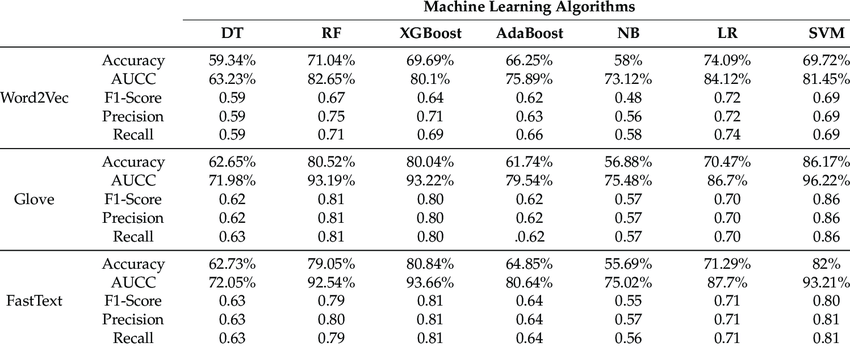

(https://www.researchgate.net/figure/Traditional-classifier-performance-using-Word2Vec-Glove-and-FastText_tbl2_360686590)


### ++++++++ Termina la sección de agregar texto: +++++++++++


#**Pregunta - 6:**

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el “valor” será su vector embebido de dimensión 300.

Este diccionario deberá ser del mismo tamaño que el vocabulario previo que hayas construido previamente.

Es recomendable que una vez que generes el nuevo vocabulario de vectores embebidos, guardes dicho diccionario en un archivo.

Recuerda borrar la variable donde descargaste los 2 millones de vectores embebidos Fasttext.



In [ ]:
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********



fast_text_dict = {}

for word in midicc:
    if word in ft:
        fast_text_dict[word] = ft[word]
    else:
        fast_text_dict[word] = np.zeros(300)

print(len(fast_text_dict))

FTF_file = '/content/drive/MyDrive/NLP/ft_dict.pkl'

with open(FTF_file, 'wb') as file:
    pickle.dump(fast_text_dict, file)

with open(FTF_file, 'rb') as file:
    embedding_dict = pickle.load(file)


# *********** Aquí termina la sección de agregar código *************

1548


#**Pregunta - 7:**



Generamos los vectores embebidos a paertir de los conjuntos de entrenamiento, validación y preuba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


trainEmb = []
for ss in train_x:
  trainEmb.append(ft.get_sentence_vector(' '.join(ss)))
trainEmb = pd.DataFrame(trainEmb)

valEmb = []
for ss in val_x:
  valEmb.append(ft.get_sentence_vector(' '.join(ss)))
valEmb = pd.DataFrame(valEmb)

testEmb = []
for ss in test_x:
  testEmb.append(ft.get_sentence_vector(' '.join(ss)))
testEmb = pd.DataFrame(testEmb)


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 300)
Val-Emb: (450, 300)
Test-Emb: (450, 300)


#**Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


modeloLR = LogisticRegression(penalty='l2', C=10, solver='lbfgs', max_iter=100, random_state=42)
modeloLR.fit(trainEmb, y_train)

print('LR: Train-accuracy: %.2f%%' % (100*modeloLR.score(trainEmb, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLR.score(valEmb, y_val)))



# *********** Aquí termina la sección de agregar código *************


LR: Train-accuracy: 87.19%
LR: Val-accuracy: 85%


In [ ]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


modeloRF = RandomForestClassifier(n_estimators=100,
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  bootstrap=True,
                                  random_state=42
)

modeloRF.fit(trainEmb,y_train)

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRF.score(trainEmb, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRF.score(valEmb, y_val)))


# *********** Aquí termina la sección de agregar código *************


RF: Train-accuracy: 99.95%
RF: Val-accuracy: 83.11%


En particular este modelo parece estar sobreentrenado ya que tiene un accuracy muy alto en los valores de entrenamiento pero un desempeño más bajo en los valores de validación. Es por eso que el mejor modelo presentado es el de Regresión Lineal.

En general los modelos tienen un mejor desepeño que al utilizar TF-IDF.

#**Pregunta - 9:**



Reporte del mejor modelo.


In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

mejor_modelo = modeloLR


print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo.score(testEmb, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo.predict(testEmb)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

# Generar el informe de clasificación
report = classification_report(y_test, pred)
print('\nInforme de clasificación:')
print('\n', report)

# *********** Aquí termina la sección de agregar código *************

Test-accuracy con el mejor modelo de Conteo 84.67%

Matriz de confusión con el mejor modelo de Conteo:
[[180  34]
 [ 35 201]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.4        0.07555556]
 [0.07777778 0.44666667]]

Informe de clasificación:

               precision    recall  f1-score   support

           0       0.84      0.84      0.84       214
           1       0.86      0.85      0.85       236

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



#**Pregunta - 10:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Esta actividad nos ayudó, en primer lugar, a reforzar y practicar los procesos de limpieza de datos, presentándonos con datos reales, así como el entrenamiento y análisis de modelos de aprendizaje automático (ML).

Además, esta actividad se centró en el uso de vectores embebidos en lugar de los vectores creados con matrices TF-IDF. Los vectores embebidos son representaciones de palabras en un espacio vectorial continuo, lo que permite capturar relaciones semánticas entre palabras. En específico, utilizamos los vectores embebidos FastText preentrenados por Facebook. Estos vectores son similares a las matrices TF-IDF, pero en general, presentaron mejores resultados. Sin embargo, hay que tener en cuenta que este método es más lento, aunque esto se puede mitigar guardando el diccionario en un archivo.

El modelo de regresión logística fue el que nos dio los mejores resultados, con una precisión del 84.67% en el conjunto de prueba sin resultar en sobreentrenamiento. Las métricas de precisión, recall y F1-score son bastante equilibradas entre las dos clases, lo que indica que el modelo no está sesgado hacia una clase específica. A pesar de las buenas métricas, siempre se puede buscar mejorar el modelo, por ejemplo, reduciendo los falsos negativos y falsos positivos mediante técnicas de optimización de hiperparámetros.

### ++++++++ Termina la sección de agregar texto: +++++++++++

##**Fin de la Actividad de vectores Embebidos - FastText**